In [1]:
from scipy.fft import *
import numpy as np
import time
from matplotlib import pyplot as plt

## Exercise 13

> Polynomial multiplication using FFT.
>
> Given polynomials $a(x) = \sum_{j=0}^n a_j x^j$ and  $b(x) =
 \sum_{j=0}^m b_j x^j$, the product $c(x) = a(x) b(x)$ is a polynomial
 $\sum_{j=0}^{n+m} c_j x^j$ with coefficients $c_j = \sum_{l=0}^j a_l
 b_{j-l}$. Implement a function for polynomial multiplication with
 $O(N \log N)$ run-time complexity using FFT (Notes Ex 1.53,  Lecture fom Oct 20).
>
>Test it for $a(x) = \sum_{j=0}^{100} x^j$ and $b(x) = \sum_{j=0}^{100}
j  x^j$.


Choosing evaluation points $(\omega_0, .., \omega_{m+n-1})$ where $\omega_k = e^{\frac{-2\pi ik}{n+m}}$, we get 

$$
a(\omega_k)  = \sum_{j=0}^{n} a_j (e^{\frac{-2\pi ik}{n}})^j = \hat{a}(k)
$$
and 
$$
b(\omega_k)  = \sum_{j=0}^{m} b_j(e^{\frac{-2\pi ik}{n}})^j = \hat{b}(k).
$$

Therefore we get 
$$
a(\omega_k)b(\omega_k) = \hat{a}(k)\hat{b}(k) = \widehat{(a * b)}(k) = \hat{c}(k).
$$

By applying inverse Discrete Fourier Transform we get the coefficients $c_j$. 

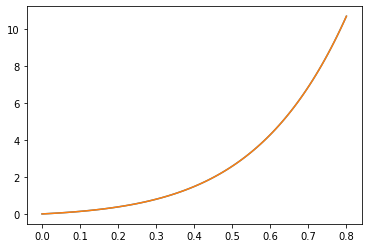

In [2]:
n = 4
a = np.concatenate((np.ones(n), np.zeros(n)))
b = np.concatenate((np.arange(n), np.zeros(n)))

c = ifft(np.multiply(fft(a), fft(b))).real

# evaluate coeff[0]+..+coeff[n]*x**n
def p(x,coeff):
    ret = coeff[0]
    a = 1
    for j in range(1,len(coeff)):
        a *= x
        ret += coeff[j]*a
    return ret
   
xval = np.linspace(0,0.8,100)
plt.plot(xval, [p(x, c) for x in xval], label='with fft')
plt.plot(xval, [p(x, np.ones(n))*p(x,np.arange(n)) for x in xval], label='direct evaluation')
plt.legend
plt.show()

## Exercise 14

Solve the heat equation using FFT. See lecture from Oct 27.
  Find $u : [0,1] \times [0,T]
   \rightarrow \mathbb{R}$ such that
   \begin{eqnarray*}
     \frac{\partial u }{\partial t}(x,t)  - \frac{\partial^2 u}{\partial
     x^2}(x,t)  & = & 0 \qquad  \qquad \forall \, x \in [0,1] \forall \, t \in
                 [0,T] \\
     u(x,0) & = & u_0(x) \qquad \forall \, x \in [0,1]
     \end{eqnarray*}
     with $u$ periodic in $x$.
     Try $u_0 = \chi_{[0.3,0.7]}$ and $u_0 = \max\{0, 1 - 10 |x-0.5|
     \}$.

Plot $u(x, t=0.01)$, $u(x, t=0.1)$, and $u(x,t=1)$. 

Be careful to choose Fourier indices in $[-n/2, n/2)$. 

Voluntary: Solve the wave equation, same $u_0$,  and $v_0 = 0$.

The continuous Fourier series for a function $f$ with period 1 is given as 

$$
f(x) = \sum_{k \in \mathbb{Z}}\hat{f}(k)e^{2\pi i kx} \tag{1}
$$

where 

$$
\hat{f} (k) = \int_0^1 f(x) e^{-2\pi i kx} dx. \tag{2}
$$ 

We can now Fourier transform the terms of the differential equality (in respect to x) 

$$
\frac{\partial \hat{u} }{\partial t}(k,t)  + (2\pi k)^2\hat{u}(k,t) = 0
$$

and get the solution 
$$
\hat{u}(k,t) = e^{-(2\pi k)^2t}\hat{u}_0(k).
$$


We can approximate (2) as

$$
\hat{f}_n (k) = \sum_{j = 0}^{n-1} f(j/n) e^{\frac{-2\pi i kj}{n}}
$$

which is exactly the expression calculated by `scipy.fft.fft`. 

For an even n, the equation (1) can be approximated by 

$$
f(x) = \sum_{k =-n/2}^{n/2-1} \hat{f}(k)e^{2\pi i kx}
$$

Which is exactly the discrete inverse Fourier transform of $f$.

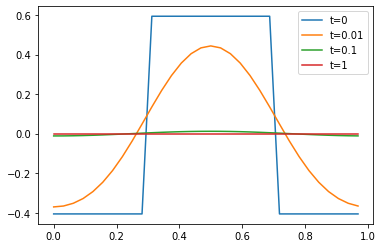

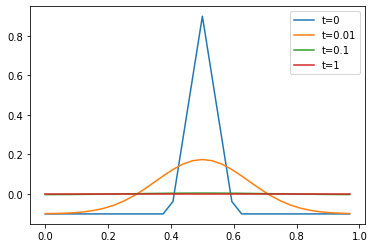

In [3]:
p = 5#11
n = int(2**p)

x = np.arange(0,1,1/n)
k = fftfreq(n, d=1/n)

# calculate u0 at equidistant points x
u0 = [[1 if (j/n >= 0.3 and j/n <= 0.7) else 0 for j in range(n)],
        [max(0,1-10*abs(j/n-0.5)) for j in range(n)]]

ut_hat = np.zeros(n)

def plot_u (u0):
    # fourier transform of solution
    uhat = lambda t: np.multiply(np.exp(-(2*np.pi*k)**2*t), fft(u0))

    plt.figure()
    t = [0, 0.01, 0.1, 1]
    for t_ in t: 
        
        # inverse fourier transform
        tmp = uhat(t_)
        tmp[0] = 0
        ut = ifft(tmp)
        ut = ut

        plt.plot(x,ut.real, label='t={}'.format(t_))

        plt.legend()
    plt.show()

plot_u (u0[0])
plot_u (u0[1])

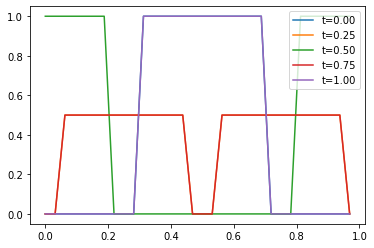

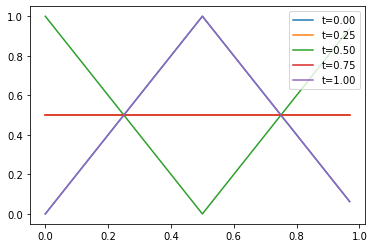

In [4]:
# calculate u0 at equidistant points x
u0 = [[1 if x_ >= 0.3 and x_ <= 0.7 else 0 for x_ in x],
        [max(0,1-2*abs(x_-0.5)) for x_ in x]]

def plot_u (u0):
    # fourier transform of solution
    uhat = lambda t: np.multiply(np.cos((2*np.pi*k)*t),fft(u0))

    plt.figure()
    t = np.linspace(0,1,5)
    for t_ in t: 
        # inverse fourier transform
        ut = ifft(uhat(t_))
        plt.plot(x,ut.real, label='t={:.2f}'.format(t_))
    plt.legend()
    plt.show()
    
plot_u (u0[0])
plot_u (u0[1])


# Exercise 15
Implement a function for numerical integration by a composite integration rule. Input is the function to be integrated, the interval $[a,b]$, the amount of subintervals $m$, and a quadrature  rule $[ (c_0, \omega_0), \ldots, (c_n, \omega_n) ] $ with reference points $c_i \in [0,1]$ and weights $\omega_i$. 

Given a partition of the interval $a = x_0 < x_1 < \dots < x_m = b$, a composite integration rule is of the form
$$
        \int_a^b f(x)\,dx = \sum_{i=0}^{m-1}\int_{x_i}^{x_{i+1}} f(x)\, dx \approx \sum_{i = 0}^{m-1}h_i\sum_{k=0}^n \omega_kf(x_i+c_kh_i) 
$$

In [5]:
def CompQuad(f, a, b, m, nodes, weights):
    assert(len(weights) == len(nodes))
    x = np.linspace(a,b,m+1)
    h = x[1]-x[0]
    quad = 0
    for i in range(m):
        for k in range(len(weights)):
            quad += weights[k] * f(x[i] + nodes[k] * h)
    return h*quad

def DetermineQuad(quadname):
    if quadname == 'trapezoidal':
        nodes = [0, 1]
        weights = [0.5, 0.5]
    elif quadname == 'simpson':
        nodes = [0,0.5, 1]
        weights = [1/6, 2/3, 1/6]
    elif quadname == 'midpoint':
        nodes = [0.5]
        weights = [1]
    elif quadname == '2pgauss':
        nodes = [0.5 - 1/(2*np.sqrt(3)), 0.5 + 1/(2*np.sqrt(3))]
        weights = [0.5, 0.5]
    elif quadname == '3pgauss':
        #including Transformation (1+x)/2
        nodes = [0.5*(1-np.sqrt(3/5)), (1+0)/2, (1+np.sqrt(3/5))/2]
        weights = [0.5*5/9, 0.5*8/9, 0.5*5/9]
    else:
        print('Quadrature not implemented')
        return
    return nodes, weights
    
quad = '2pgauss'
nodes, weights = DetermineQuad(quad)
f = lambda x: x**3 + x
a = 0
b = 1
m = 4
print(CompQuad(f, a, b, m, nodes, weights))



0.75


Study convergence for the functions $f(x) = e^x$ and $f(x) = \sqrt{x}$, and integration rules

-) trapezoidal:   $[ (0, 0.5), (1, 0.5)]$

-) Simpson:   $[ (0, 1/6), (0.5, 2/3), (1, 1/6)]$

-) mid-point: $[(0.5, 1)]$

-) 2-point Gaussian rule: $[(0.5-0.5/\sqrt{3}, 0.5), (0.5+0.5/\sqrt{3}, 0.5)]$




In [6]:
f1 = lambda x: np.exp(x)
f2 = lambda x: np.sqrt(x)
a = 0
b = 1
n = 30
num = [i for i in range(1,n)]

int1 = np.exp(1)-1
int2 = 2/3
quadname = ['trapezoidal', 'simpson', 'midpoint', '2pgauss', '3pgauss']

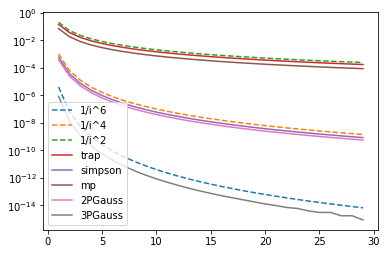

In [7]:
ytrap = []
ysim = []
ymid = []
y2pg = []
y3pg = []
y4 = []
y5 = []
yquad = []
for i in range(1,n):
    
    y5.append(4e-6/i**6)
    y4.append(1e-3/i**4)
    yquad.append(2e-1/i**2)
    
    error = abs(int1 - CompQuad(f1, a, b, i, *DetermineQuad(quadname[0])))
    ytrap.append(error)
                
    error = abs(int1 - CompQuad(f1, a, b, i, *DetermineQuad(quadname[1])))
    ysim.append(error)
                
    error = abs(int1 - CompQuad(f1, a, b, i, *DetermineQuad(quadname[2])))
    ymid.append(error)
                
    error = abs(int1 - CompQuad(f1, a, b, i, *DetermineQuad(quadname[3])))
    y2pg.append(error)
    
    error = abs(int1 - CompQuad(f1, a, b, i, *DetermineQuad(quadname[4])))
    y3pg.append(error)

plt.plot(num, y5, '--',label = '1/i^6')
plt.plot(num, y4, '--',label = '1/i^4')
plt.plot(num, yquad, '--', label = '1/i^2')
plt.plot(num, ytrap, label = 'trap')
plt.plot(num, ysim, label = 'simpson')
plt.plot(num, ymid, label = 'mp')
plt.plot(num, y2pg, label = '2PGauss')
plt.plot(num, y3pg, label = '3PGauss')
plt.yscale('log')
plt.legend()
plt.show()


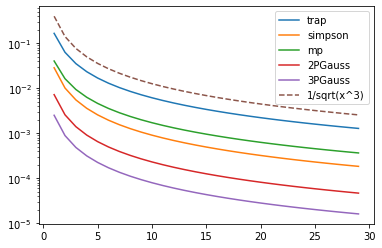

In [8]:
ytrap = []
ysim = []
ymid = []
y2pg = []
y3pg = []
yref = []
for i in range(1,n):
    
    yref.append(0.4/np.power(i,1.5))
    error = abs(int2 - CompQuad(f2, a, b, i, *DetermineQuad(quadname[0])))
    ytrap.append(error)
                
    error = abs(int2 - CompQuad(f2, a, b, i, *DetermineQuad(quadname[1])))
    ysim.append(error)
                
    error = abs(int2 - CompQuad(f2, a, b, i, *DetermineQuad(quadname[2])))
    ymid.append(error)
                
    error = abs(int2 - CompQuad(f2, a, b, i, *DetermineQuad(quadname[3])))
    y2pg.append(error)
    
    error = abs(int2 - CompQuad(f2, a, b, i, *DetermineQuad(quadname[4])))
    y3pg.append(error)

plt.plot(num, ytrap, label = 'trap')
plt.plot(num, ysim, label = 'simpson')
plt.plot(num, ymid, label = 'mp')
plt.plot(num, y2pg, label = '2PGauss')
plt.plot(num, y3pg, label = '3PGauss')
plt.plot(num, yref, '--', label = '1/sqrt(x^3)')

plt.yscale('log')
plt.legend()
plt.show()

# Ecercise 16

Determine the 3-point Gaussian quadrature rule.
 
 -) Calculate the Legendre polynomial $L_3$, either by orthogonalizaton by hand, or by Rodrigues' formula, or by
      using the recurrence relation.

We compute $L_3(x)$ by means of the recurrence relation
$$
    L_{n+1}(x) = \frac{2n+1}{n+1}xL_n(x) - \frac{n}{n+1}L_{n-1}(x),
$$
with $L_1(x) = x$ and $L_0(x) = 1$. We therefore need to compute $L_2(x)$ first. There holds
$$
    L_2(x) = \frac{3}{2}xL_1(x) - \frac{1}{2}L_0(x) = \frac{1}{2}(3x^2 - 1).
$$
Hence,
$$
    L_3(x) = \frac{5}{3}x\frac{1}{2}\left(3x^2-1\right) - \frac{2}{3}x = \frac{1}{2}(5x^3 - 3x).
$$

-) Find the roots of $L_3$ to define the quadrature points (in $[-1,1]$).
 
   One observes 
   $$
       L_3(x) = 0 \Longleftrightarrow x(5x^2 - 3) = 0 \Longleftrightarrow x = 0, \pm\sqrt{\frac{3}{5}}
   $$
 
 -) Find the weights by integrating monomials $x^k$, and solving a  $2 \times 2$ system.

Setting $x_0 := -\sqrt{\frac{3}{5}}, x_1 = 0$, and $x_2 := \sqrt{\frac{3}{5}}$, we conclude that
$$
    \int_{-1}^1x^k dx = \sum_{j=0}^2 \omega_jx_j^k
$$
for all $k = 0,1,2$. Due to $x_1 = 0$ we deduce

\begin{align}
    0 = \int_{-1}^1 x dx = \sqrt{\frac{3}{5}}(\omega_2-\omega_0)
\end{align}
and thus $\omega_2 = \omega_0$. For $k = 0$ and $k = 2$ the equations from above yield
$$
    2 = \int_{-1}^1 1 dx = \omega_0 + \omega_1 + \omega_0 \\
    \frac{2}{3} = \int_{-1}^1 x^2 dx = \omega_0\frac{3}{5} + \frac{3}{5}\omega_0 = \frac{2}{3}\omega_0.
$$
We conclude that $\omega_0 = \omega_2 = \frac{5}{9}$ and $\omega_1 = \frac{8}{9}.$
  
 -) Use the 3-point Gauss rule in Ex 15. Be careful with the reference interval, either $[0,1]$ or $[-1,1]$. 